In [22]:
import numpy as np
import matplotlib.pyplot as plt

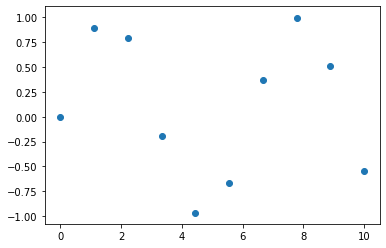

In [30]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

In [31]:
from scipy.interpolate import interp1d

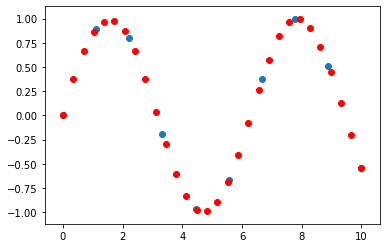

In [34]:
f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 30)
result = f(new_x)
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

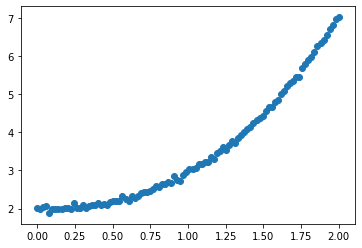

In [36]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 + 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [47]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [48]:
from scipy import optimize

In [60]:
params, param_curve = optimize.curve_fit(f, x, y)
params[3]

1.9876045361693961

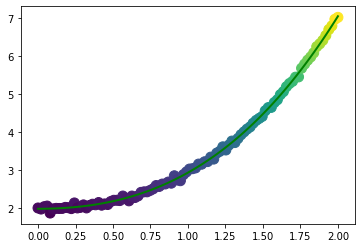

In [66]:
plt.scatter(x, y, c=y, s=100)
plt.plot(x, f(x,params[0], params[1], params[2], params[3]), c='g', lw=2)

In [67]:
def f(x):
    return x**2 + 15*np.sin(x)

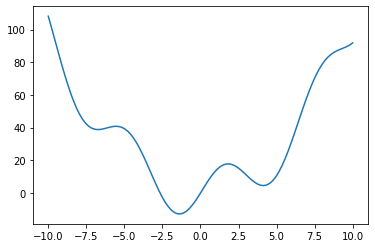

In [68]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [83]:
x0=-5
result = optimize.minimize(f, x0=x0).x

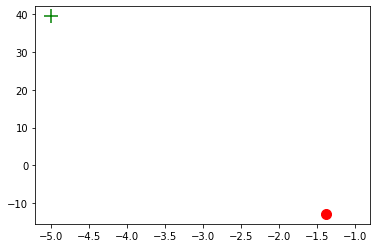

In [84]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()